# Introduction to the ice fitting workshop - 10/jun/2022

### Continuum determination (Blackbody approach)



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import interp1d
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from lmfit.model import save_modelresult
import site
%matplotlib notebook

In [7]:
#======================================================================
print('Performing deconvolution by Lorentzian or Gaussian of the silicate profile...')
#======================================================================

def get_line_number2(value, matrix):
    """
    Function used to get the line number of a value in a array.
    
    Parameters
    -------------
    
    value : 'float'
        Value of interest.
    
    matrix : 'numpy.ndarray'
        Vector with the value of interest.
    
    Returns
    ------------
    
    Index
        
    """
    for i, line in enumerate(matrix, 1):
        if line == value:
            return i


def find_nearest(array, value):
    """
    Find nearest value of a given number.
    
    Parameters
    -------------
    
    array : 'numpy.ndarray'
        Vector with the value of interest.
    
    value : 'float'
        Value of interest.
    
    Returns
    -------------
    Nearest value
        
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
dir = os.getcwd()


Performing deconvolution by Lorentzian or Gaussian of the silicate profile...


In [43]:
###############  DECONVOLUTION  ############################################
def extract_silicate(filename, xmin, xmax, npoints, silicate_guess_factor):
    """
    Used to combine files in the genetic algorithm spectral decomposition.
    
    Parameters
    -------------
    
    filename : 'str'
        Optical depth file.
    
    xmin, xmax : 'float'
        Range used in the spectral decomposition.
    
        
    
    Returns
    -------------
    
    File 'New_tau_no_silic_'+name_source+'.txt' With the optical depth without the silicate profile.
    
    """
    fig = plt.figure()
    ###################SILICATE PROFILE############
    DIR = os.getcwd() + '/'
    tau_data = filename
    t = np.loadtxt(tau_data).T
    xtau = t[0]
    ytau = t[1]
    etau = t[2]
    
    print(filename)
    name_source = filename.split('.')[0]
    
    t0 = np.loadtxt('Silicate_GCS3_new.out').T
    x_silic0 = t0[0]
    y_silic0 = t0[1]*silicate_guess_factor
    
    #exit()
    
    npoints = npoints
    pp1 = find_nearest(xtau, xmin)
    pp2 = find_nearest(xtau, xmax)
    
    tt = np.linspace(pp1, pp2, int(npoints))
    
    
    Fd_silic0 = interp1d(x_silic0,y_silic0, kind='linear')    #interpolate silicate data
    Fsilic0 = Fd_silic0(tt)
    
    Finp0 = interp1d(xtau,ytau, kind='linear')    #interpolate silicate data
    Finp = Finp0(tt)
    
    Fetau0 = interp1d(xtau,etau, kind='linear')    #interpolate silicate data
    Fetau = Fetau0(tt)
    
    plt.plot(tt, Fsilic0, label='CGS3 silicate (guess)', color='limegreen')
    
    tau_nosilic = Finp - Fsilic0
    
    np.savetxt('Removed_silicate_spectrum.txt', np.transpose([tt, tau_nosilic,Fetau]))
    
    
    taumax = max(ytau) + 0.1*max(ytau)
    
    plt.plot(xtau, ytau, color= 'black', label=name_source)
    plt.plot(tt, tau_nosilic, color= 'blue', label=name_source+' '+'(Removed Silicate)')
    #plt.plot(tt, ytau*0., ':', color='lightgrey')
    plt.minorticks_on()
    plt.tick_params(which='major', direction='in', labelsize=10)
    plt.tick_params(which='minor', direction='in', labelsize=10)
    plt.xlim(min(tt),max(tt))
    plt.ylim(taumax,-0.1)
    plt.legend(loc='best', frameon=False, fontsize=9)
    plt.ylabel(r'Optical Depth$\mathrm{(\tau_{\lambda})}$',fontsize=10)
    plt.xlabel(r'$\lambda\ \mathrm{[\mu m]}$',fontsize=10)
    
    plt.savefig('Silicate_deconv.pdf',format='pdf', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


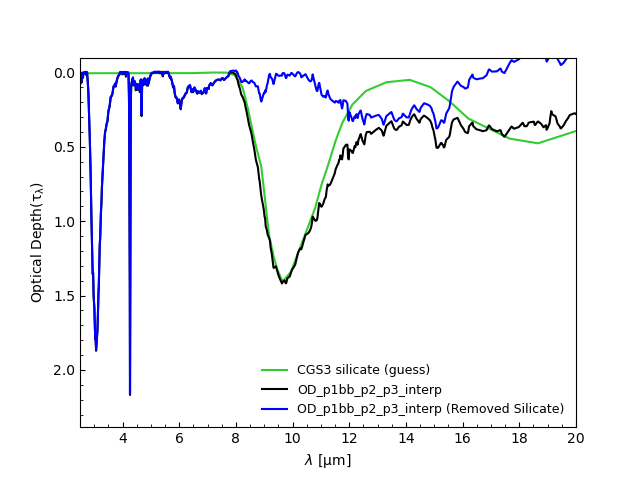

OD_p1bb_p2_p3_interp.dat


In [44]:
filename = 'OD_p1bb_p2_p3_interp.dat'
extract_silicate(filename, 2.5, 20., 5000, 0.72)